<a href="https://colab.research.google.com/github/Red-red1/477_data_mining_lab/blob/main/data_mining_lab_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Getting Ready

**Installing necessary Libraries**

In [13]:
!pip install yt-dlp pandas matplotlib webvtt-py

**Importing Libraries**

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import webvtt
import pandas as pd
from collections import Counter

# PART 2: Data Collection & Selection

VIDEO LINK:
> [TED](https://www.youtube.com/watch?v=h3M00JI8Iwo)



**Downloading English auto-generated subtitles**

In [15]:
!yt-dlp \
  --write-auto-subs \
  --sub-lang en \
  --skip-download \
  https://www.youtube.com/watch?v=h3M00JI8Iwo

!mv *.en.vtt captions.vtt

[youtube] Extracting URL: https://www.youtube.com/watch?v=h3M00JI8Iwo
[youtube] h3M00JI8Iwo: Downloading webpage
[youtube] h3M00JI8Iwo: Downloading android sdkless player API JSON
[youtube] h3M00JI8Iwo: Downloading web safari player API JSON
[youtube] h3M00JI8Iwo: Downloading m3u8 information
[info] h3M00JI8Iwo: Downloading subtitles: en
[info] h3M00JI8Iwo: Downloading 1 format(s): 399+251
[info] Writing video subtitles to: The Art of Reading Minds ｜ Oz Pearlman ｜ TED [h3M00JI8Iwo].en.vtt
[download] Destination: The Art of Reading Minds ｜ Oz Pearlman ｜ TED [h3M00JI8Iwo].en.vtt
[download] 100% of  119.83KiB in 00:00:00 at 887.13KiB/s


**Showing the current Directories**

In [16]:
import os

print("Files in current directory:")
os.listdir()

Files in current directory:


['.config',
 'sample_data',
 'drive',
 'captions.vtt',
 'comments.txt',
 '.ipynb_checkpoints']

# PART 3: Data Processing & Lab Experiments

## A. Loading Comments and Captions in Python

**Loading & Cleaning Comments**

In [17]:
def load_raw_comments(filepath='comments.txt'):
    comments = []
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()

            if len(line) > 0 and not line.endswith('ago') and line.lower() != 'reply':
                comments.append(line)
    return comments

raw_comments = load_raw_comments()

print(f"Loaded {len(raw_comments)} potential comment lines.")
print("Sample comments:")
raw_comments[:5]

Loaded 291 potential comment lines.
Sample comments:


['@JDean-vh5dz',
 "I'm still struggling to think of someone I would want to have dinner with.",
 '@metaversebit',
 'We all got clickbated by TED.',
 '@aknarnitin']

**Loading & Cleaning Captions**

In [18]:
def load_vtt_captions(filepath='captions.vtt'):
    captions = []
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            # Ignore timestamps, numbers, and metadata
            if (
                '-->' not in line and
                line and
                not line.isdigit() and
                'WEBVTT' not in line
            ):
                captions.append(line)
    return captions

raw_captions = load_vtt_captions()

print(f"Loaded {len(raw_captions)} caption lines.")
print("Sample captions:")
raw_captions[:5]

Loaded 1100 caption lines.
Sample captions:


['Kind: captions',
 'Language: en',
 "I<00:00:04.560><c> am</c><00:00:04.720><c> build</c><00:00:05.040><c> as</c><00:00:05.279><c> the</c><00:00:05.440><c> world's</c><00:00:05.759><c> greatest</c><00:00:06.160><c> mind</c>",
 "I am build as the world's greatest mind",
 "I am build as the world's greatest mind"]

## B. Required Lab Experiments

**Histogram of Lengths (Captions vs. Comments)**

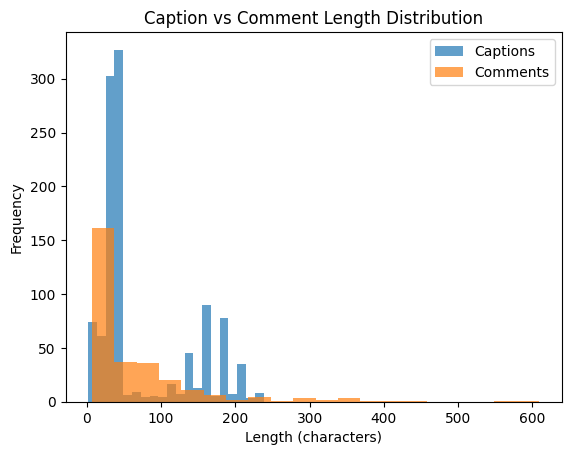

In [19]:
caption_lengths = [len(x) for x in raw_captions]
comment_lengths = [len(x) for x in raw_comments]

plt.hist(caption_lengths, bins=20, alpha=0.7, label='Captions')
plt.hist(comment_lengths, bins=20, alpha=0.7, label='Comments')
plt.xlabel('Length (characters)')
plt.ylabel('Frequency')
plt.title('Caption vs Comment Length Distribution')
plt.legend()
plt.show()

**Vocabulary Diversity (Type-Token Ratio)**

In [20]:
def type_token_ratio(lines):
    words = [word.lower() for line in lines for word in line.split()]
    unique_words = set(words)
    return len(unique_words) / len(words) if words else 0

print("Caption TTR:", type_token_ratio(raw_captions))
print("Comment TTR:", type_token_ratio(raw_comments))

Caption TTR: 0.43072205185391693
Comment TTR: 0.4226867506916692


**Top-N Word Frequency (After Stopword Removal)**

In [21]:
N = 20
stop_words = {'the', 'and', 'to', 'a', 'of', 'in', 'that', 'is', 'it', 'for',
              'on', 'with', 'as', 'are', 'this', 'was', 'but', 'be', 'by',
              'or', 'an', 'you'}

def get_top_words(texts, n):
    counter = Counter()
    for t in texts:
        for word in t.split():
            if word.lower() not in stop_words:
                counter[word.lower()] += 1
    return counter.most_common(n)

caption_top_words = get_top_words(raw_captions, N)
comment_top_words = get_top_words(raw_comments, N)

print('Top words in captions:')
for word, count in caption_top_words:
    print(f'{word}: {count}')

print('\nTop words in comments:')
for word, count in comment_top_words:
    print(f'{word}: {count}')

Top words in captions:
i: 158
&gt;&gt;: 118
your: 70
what: 34
going: 34
have: 32
not: 30
if: 28
give: 26
do: 24
i'm: 24
am: 22
we: 22
see: 22
my: 22
like: 22
me: 22
he: 22
can: 20
at: 20

Top words in comments:
i: 70
he: 61
not: 26
how: 24
my: 18
his: 18
all: 17
people: 17
me: 16
ted: 15
have: 14
just: 13
like: 13
out: 12
what: 12
at: 12
name: 12
it's: 12
can: 11
more: 11
